### 1 Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 2 Load the data

In [2]:
path=r'G:\ajay\Ajay\Education\1.1 IT sector\Practice works\Datasets\cell_samples (1).csv'
data=pd.read_csv(path)
data

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [3]:
# Check the missing data
data.count()

ID             699
Clump          699
UnifSize       699
UnifShape      699
MargAdh        699
SingEpiSize    699
BareNuc        699
BlandChrom     699
NormNucl       699
Mit            699
Class          699
dtype: int64

In [4]:
# Category of classes with counts
data['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

### 3 Distribution of the classes

In [5]:
belign=data[data['Class']==2]
malignant=data[data['Class']==4]

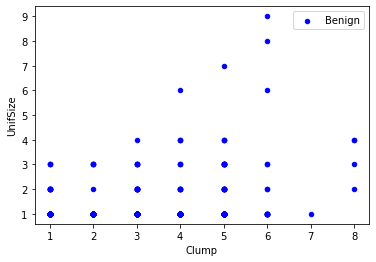

In [6]:
# plotting belign class wrt clump and unifsize
bel=belign.plot(kind='scatter', x='Clump', y='UnifSize', color='blue', label='Benign')

<AxesSubplot:xlabel='Clump', ylabel='UnifSize'>

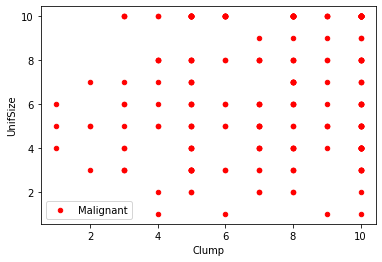

In [7]:
# plotting Malignant class wrt clump and unifsize
malignant.plot(kind='scatter', x='Clump', y='UnifSize', color='red', label='Malignant')

In [8]:
# Both the plots in one plot with ax parameter and bel is first plot name
malignant.plot(kind='scatter', x='Clump', y='UnifSize', color='red', label='Malignant', ax=bel)

<AxesSubplot:xlabel='Clump', ylabel='UnifSize'>

### 4 Identifying unwanted rows

In [9]:
data.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [10]:
# converting object datatype to numeric
data=data[pd.to_numeric(data['BareNuc'], errors='coerce').notnull()]
data['BareNuc']=data['BareNuc'].astype('int')

C:\Users\mypc\AppData\Local\Temp\ipykernel_9568\2938685767.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['BareNuc']=data['BareNuc'].astype('int')


In [11]:
data.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

### 5 Remove unwanted columns

In [22]:
data.columns

feature=data[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]

# Independant var
x=np.asarray(feature)

# Dependant var
y=np.asarray(data['Class'])

### 6 Divide the data for train/ test dataset

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=4)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((546, 9), (137, 9), (546,), (137,))

### 7 Modeling SVM with Scikit learn

In [29]:
from sklearn import svm
classifier=svm.SVC(kernel='linear', gamma='auto', C=2)
classifier.fit(x_train, y_train)

y_predict= classifier.predict(x_test)

### 8 Evaluation results

In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

